<h1>Data preprocessing!</h1>

In [14]:
# Usual import
from pprint import pprint
from pandas import DataFrame
import numpy as np
import pandas as pd
from tqdm import tqdm
import string
import ast
import os

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim.utils import simple_preprocess



In [4]:
with open("C:/Users/Iro Sfoungari/Desktop/THESIS DATA/FINAL_DATABASE/Step_1_Data_Lemmatized.txt", 'r',encoding='utf-8') as f:
    data_lemmatized = [ast.literal_eval(line.strip()) for line in f]

In [5]:
print(data_lemmatized[0])

['objective', 'retrospective_chart_review', 'describe', 'epidemiology', 'clinical', 'feature', 'patient', 'culture', 'prove', 'mycoplasma_pneumoniae', 'infection', 'king_abdulaziz_university', 'hospital', 'jeddah_saudi_arabia', 'method', 'patient', 'positive', 'pneumoniae', 'culture', 'respiratory', 'specimen', 'january', 'december', 'identify', 'microbiology', 'record', 'chart', 'patient', 'review', 'result', 'patient', 'identify', 'required', 'admission', 'infection', 'community_acquired', 'infection', 'affect', 'age', 'group', 'common', 'infant', 'pre', 'school', 'child', 'occur', 'year', 'round', 'common', 'fall', 'spring', 'quarter', 'patient', 'comorbiditie', 'isolate', 'associate', 'pneumonia', 'upper', 'respiratory', 'tract', 'infection', 'bronchiolitis', 'cough_fever', 'malaise', 'common', 'symptom', 'crepitation', 'wheeze', 'common', 'sign', 'patient', 'pneumonia', 'crepitation', 'bronchial', 'breathing', 'patient', 'likely', 'non', 'patient', 'present', 'pneumonia', 'versus'

In [13]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 5), (11, 1), (12, 4), (13, 1), (14, 1), (15, 1), (16, 2), (17, 2), (18, 1), (19, 1), (20, 1), (21, 3), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [14]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


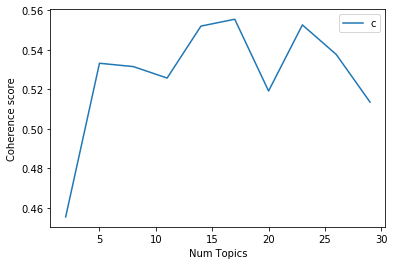

In [210]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=30, step=3)
# Show graph
import matplotlib.pyplot as plt
limit=30; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [211]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4555
Num Topics = 5  has Coherence Value of 0.5333
Num Topics = 8  has Coherence Value of 0.5316
Num Topics = 11  has Coherence Value of 0.5258
Num Topics = 14  has Coherence Value of 0.5521
Num Topics = 17  has Coherence Value of 0.5555
Num Topics = 20  has Coherence Value of 0.5192
Num Topics = 23  has Coherence Value of 0.5527
Num Topics = 26  has Coherence Value of 0.5377
Num Topics = 29  has Coherence Value of 0.5136


In [212]:
# Select the model and print the topics
optimal_model = model_list[5]
model_topics = optimal_model.show_topics(formatted=False)
#pprint(optimal_model.print_topics())

[(0,
  '0.035*"study" + 0.019*"datum" + 0.017*"analysis" + 0.015*"research" + '
  '0.011*"information" + 0.011*"result" + 0.011*"method" + 0.011*"include" + '
  '0.011*"review" + 0.010*"base"'),
 (1,
  '0.053*"protein" + 0.023*"virus" + 0.022*"sars" + 0.020*"viral" + '
  '0.018*"bind" + 0.013*"target" + 0.012*"host" + 0.010*"drug" + '
  '0.010*"structure" + 0.010*"rna"'),
 (2,
  '0.074*"patient" + 0.018*"treatment" + 0.016*"case" + 0.015*"cancer" + '
  '0.014*"lung" + 0.014*"clinical" + 0.011*"present" + 0.010*"surgery" + '
  '0.010*"surgical" + 0.009*"diagnosis"'),
 (3,
  '0.023*"activity" + 0.017*"effect" + 0.013*"study" + 0.013*"result" + '
  '0.012*"show" + 0.011*"ibv" + 0.011*"concentration" + 0.010*"treatment" + '
  '0.008*"cell" + 0.008*"inhibit"'),
 (4,
  '0.013*"air" + 0.012*"environmental" + 0.012*"mask" + 0.010*"temperature" + '
  '0.009*"water" + 0.009*"environment" + 0.009*"particle" + 0.009*"high" + '
  '0.009*"surface" + 0.008*"aerosol"'),
 (5,
  '0.029*"test" + 0.022*"m

In [7]:
#from gensim.test.utils import datapath

#Save model to disk.
#temp_file = datapath("C:/Users/Iro Sfoungari/Desktop/FINAL_DATABASE/lda_model.csv")
#optimal_model.save(temp_file)


In [8]:
# Load a potentially pretrained model from disk.
ldaM = LdaModel.load("C:/Users/Iro Sfoungari/Desktop/THESIS DATA/FINAL_DATABASE/Step_2_LDA_model/lda_model.csv")

In [10]:
data = pd.read_csv("C:/Users/Iro Sfoungari/Desktop/THESIS DATA/FINAL_DATABASE/Only_english_Data.csv" ,low_memory=False)


In [15]:
len(data)

269233

In [16]:
var=ldaM.print_topic(1)

In [17]:
var

'0.053*"protein" + 0.023*"virus" + 0.022*"sars" + 0.020*"viral" + 0.018*"bind" + 0.013*"target" + 0.012*"host" + 0.010*"drug" + 0.010*"structure" + 0.010*"rna"'

In [18]:
var1= ldaM.num_topics

In [19]:
var1

17

In [20]:
doiList = data['cord_uid'].tolist()


In [21]:
corpus_transformed = ldaM[corpus]
s1=list(corpus_transformed)

In [22]:
k=list(zip(doiList, s1))


In [ ]:
#for i in k:
    #print(i)

In [24]:
df = DataFrame (k,columns=['cord_uid','Topic'])

In [32]:
df.head(10)

,cord_uid,Topic
0,ug7v899j,"9, 0.02978878), 11, 0.37990746), 13, 0.0665020..."
1,02tnwd4m,"2, 0.06857341), 3, 0.091626994), 4, 0.19114812..."
2,ejv2xln0,"1, 0.056604512), 2, 0.020819936), 3, 0.0384809..."
3,2b73a28n,"1, 0.112175405), 6, 0.06806842), 13, 0.0909821..."
4,9785vg6d,"6, 0.28393435), 9, 0.26332456), 14, 0.15155393..."
5,zjufx4fo,"1, 0.34758), 3, 0.06844509), 4, 0.09506548), 9..."
6,5yhe786e,"2, 0.3030509), 6, 0.0266319), 11, 0.21471772),..."
7,8zchiykl,"2, 0.1900594), 5, 0.079908825), 11, 0.17909044..."
8,8qnrcgnk,"2, 0.026015982), 3, 0.1625151), 4, 0.0274275),..."
9,jg13scgo,"0, 0.37473992), 3, 0.0112911705), 5, 0.1053074..."


In [26]:
len(df)

269233

In [27]:
df['Topic'] = df['Topic'].astype(str)

In [30]:
df['Topic'] = df['Topic'].str.replace("[","")


In [31]:
df['Topic'] = df['Topic'].str.replace("(","")


In [33]:
df['Topic'] = df['Topic'].str.replace("]","")


In [34]:
df['Topic'] = df['Topic'].str.replace(" ","")


In [35]:
df2= df['Topic'].str.split("\),", expand=True)


In [36]:
df2.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,"9,0.02978878","11,0.37990746","13,0.066502035","14,0.45598003","16,0.061569713)",None,None,None,None,None,None,None,None,None,None,None,None
1,"2,0.06857341","3,0.091626994","4,0.19114812","5,0.036680907","12,0.019714378","15,0.5840331)",None,None,None,None,None,None,None,None,None,None,None
2,"1,0.056604512","2,0.020819936","3,0.0384809","4,0.22585802","6,0.36523408","9,0.038677417","12,0.017933968","15,0.23168091)",None,None,None,None,None,None,None,None,None
3,"1,0.112175405","6,0.06806842","13,0.09098211","15,0.7074866)",None,None,None,None,None,None,None,None,None,None,None,None,None
4,"6,0.28393435","9,0.26332456","14,0.15155393","15,0.28863946)",None,None,None,None,None,None,None,None,None,None,None,None,None
5,"1,0.34758","3,0.06844509","4,0.09506548","9,0.36533394","14,0.06716935","15,0.049104705)",None,None,None,None,None,None,None,None,None,None,None
6,"2,0.3030509","6,0.0266319","11,0.21471772","12,0.28216165","16,0.16221994)",None,None,None,None,None,None,None,None,None,None,None,None
7,"2,0.1900594","5,0.079908825","11,0.17909044","12,0.37986264","14,0.049179118","15,0.109185606)",None,None,None,None,None,None,None,None,None,None,None
8,"2,0.026015982","3,0.1625151","4,0.0274275","6,0.24711113","15,0.53031963)",None,None,None,None,None,None,None,None,None,None,None,None
9,"0,0.37473992","3,0.0112911705","5,0.105307445","7,0.078344524","8,0.07826442","12,0.30639505","14,0.040290974)",None,None,None,None,None,None,None,None,None,None


In [37]:
data=pd.concat([df['cord_uid'], df2], axis=1)


In [38]:
data.head(10)

,cord_uid,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,ug7v899j,"9,0.02978878","11,0.37990746","13,0.066502035","14,0.45598003","16,0.061569713)",None,None,None,None,None,None,None,None,None,None,None,None
1,02tnwd4m,"2,0.06857341","3,0.091626994","4,0.19114812","5,0.036680907","12,0.019714378","15,0.5840331)",None,None,None,None,None,None,None,None,None,None,None
2,ejv2xln0,"1,0.056604512","2,0.020819936","3,0.0384809","4,0.22585802","6,0.36523408","9,0.038677417","12,0.017933968","15,0.23168091)",None,None,None,None,None,None,None,None,None
3,2b73a28n,"1,0.112175405","6,0.06806842","13,0.09098211","15,0.7074866)",None,None,None,None,None,None,None,None,None,None,None,None,None
4,9785vg6d,"6,0.28393435","9,0.26332456","14,0.15155393","15,0.28863946)",None,None,None,None,None,None,None,None,None,None,None,None,None
5,zjufx4fo,"1,0.34758","3,0.06844509","4,0.09506548","9,0.36533394","14,0.06716935","15,0.049104705)",None,None,None,None,None,None,None,None,None,None,None
6,5yhe786e,"2,0.3030509","6,0.0266319","11,0.21471772","12,0.28216165","16,0.16221994)",None,None,None,None,None,None,None,None,None,None,None,None
7,8zchiykl,"2,0.1900594","5,0.079908825","11,0.17909044","12,0.37986264","14,0.049179118","15,0.109185606)",None,None,None,None,None,None,None,None,None,None,None
8,8qnrcgnk,"2,0.026015982","3,0.1625151","4,0.0274275","6,0.24711113","15,0.53031963)",None,None,None,None,None,None,None,None,None,None,None,None
9,jg13scgo,"0,0.37473992","3,0.0112911705","5,0.105307445","7,0.078344524","8,0.07826442","12,0.30639505","14,0.040290974)",None,None,None,None,None,None,None,None,None,None


In [39]:
len(data.columns)


18

In [ ]:
for x in range(len(data.columns)-1):
    Datas_First_Topic = data[['cord_uid', x]]
    Datas_First_Topic= Datas_First_Topic[x].str.split(",", expand=True)
    Datas_First_Topic=pd.concat([df['cord_uid'], Datas_First_Topic], axis=1)
    Datas_First_Topic.columns = ['cord_uid', 'Topic', 'Probability']
    Datas_First_Topic['Probability'] = Datas_First_Topic['Probability'].str.replace(")","")
    new_df = Datas_First_Topic[Datas_First_Topic["Topic"].str.contains('None') == False]
    for index, row in new_df.iterrows():
        row['Topic']=ldaM.print_topic(int(row['Topic']))
    new_df['Topic']=new_df['Topic'].str.replace('"','')
    new_df['Topic']=new_df['Topic'].str.replace(" ","")
    new_df['Topic']=new_df['Topic'].str.replace("+",", ")
    new_df["Topic"]=new_df["Topic"].str.replace(", ", ",")
    new_df.to_csv(r'C:/Users/Iro Sfoungari/Desktop/THESIS DATA/FINAL_DATABASE/Topics/'+str(x)+'_Topic.csv', index = False)
tqdm.pandas()

<h2>Sources</h2>
<a href="https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/">Topic Modeling with Gensim (Python)</a> 
<a href="https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0">Evaluate Topic Models: Latent Dirichlet Allocation (LDA)</a>
<a href="https://datascienceplus.com/evaluation-of-topic-modeling-topic-coherence/">Evaluation of Topic Modeling: Topic Coherence</a>
<a href="https://www.kaggle.com/thebrownviking20/topic-modelling-with-spacy-and-scikit-learn#">Topic modelling with spaCy and scikit-learn</a>